![example](images/director_shot.jpeg)

# EDA of the IMDB Movies Database

**Authors:** Melody Bass
***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

In [314]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [315]:
# Here you run your code to explore the data

df = pd.read_csv('data/zippeddata/datasets/all_df.csv')

df.head()

/Users/melodybass/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,description_#words,movie_title
0,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0,32,den sorte drøm
1,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0,18,cleopatra
2,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0,29,l'inferno
3,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...","From the Manger to the Cross; or, Jesus of Naz...",1912,1913,"Biography, Drama",60,USA,English,Sidney Olcott,...,5.7,484,NaN,NaN,NaN,NaN,13.0,5.0,36,"from the manger to the cross; or, jesus of naz..."
4,tt0002423,Madame DuBarry,Madame DuBarry,1919,1919-11-26,"Biography, Drama, Romance",85,Germany,German,Ernst Lubitsch,...,6.8,753,NaN,NaN,NaN,NaN,12.0,9.0,22,madame dubarry


In [316]:
df.shape

(74889, 24)

In [317]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74889 entries, 0 to 74888
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          74889 non-null  object 
 1   title                  74889 non-null  object 
 2   original_title         74889 non-null  object 
 3   year                   74889 non-null  object 
 4   date_published         74889 non-null  object 
 5   genre                  74889 non-null  object 
 6   duration               74889 non-null  int64  
 7   country                74830 non-null  object 
 8   language               74171 non-null  object 
 9   director               74823 non-null  object 
 10  writer                 73584 non-null  object 
 11  production_company     71145 non-null  object 
 12  actors                 74837 non-null  object 
 13  description            74889 non-null  object 
 14  avg_vote               74889 non-null  float64
 15  vo

In [318]:
df.isnull().sum()

imdb_title_id                0
title                        0
original_title               0
year                         0
date_published               0
genre                        0
duration                     0
country                     59
language                   718
director                    66
writer                    1305
production_company        3744
actors                      52
description                  0
avg_vote                     0
votes                        0
budget                   54078
usa_gross_income         61331
worlwide_gross_income    47971
metascore                63211
reviews_from_users        6047
reviews_from_critics      9708
description_#words           0
movie_title                  0
dtype: int64

In [319]:
df.describe()

,duration,avg_vote,votes,metascore,reviews_from_users,reviews_from_critics,description_#words
count,74889.000000,74889.000000,7.488900e+04,11678.000000,68842.000000,65181.000000,74889.000000
mean,100.352522,5.900541,9.730489e+03,55.712023,46.574853,27.658566,29.717956
std,22.357984,1.229920,5.473764e+04,17.763344,180.482569,58.829668,7.226405
min,41.000000,1.000000,9.900000e+01,1.000000,1.000000,1.000000,16.000000
25%,88.000000,5.200000,2.100000e+02,43.000000,4.000000,3.000000,24.000000
50%,96.000000,6.100000,5.000000e+02,56.000000,9.000000,8.000000,31.000000
75%,108.000000,6.800000,1.789000e+03,69.000000,27.000000,24.000000,35.000000
max,808.000000,9.900000,2.278845e+06,100.000000,10472.000000,999.000000,79.000000


In [320]:
sum(df.duplicated())

0

In [321]:
df.nunique()

imdb_title_id            74889
title                    71907
original_title           70906
year                       151
date_published           20790
genre                     1213
duration                   258
country                   4483
language                  3994
director                 31925
writer                   59381
production_company       29309
actors                   74806
description              74821
avg_vote                    89
votes                    13733
budget                    4217
usa_gross_income         13171
worlwide_gross_income    26446
metascore                   99
reviews_from_users        1169
reviews_from_critics       578
description_#words          63
movie_title              70868
dtype: int64

## Data Preparation and Cleaning

In this section, I will clean the dataset by removing unused columns and trim the dataset of null values and irrelevant data to the questions that I want to answer.  I will then extract data and create new columns to prepare for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

### Remove data from outside USA

In [322]:
# Drop rows where movie was not made in USA, to avoid currency conversion issues
df = df[df.country == 'USA']

In [323]:
# Drop rows that do not have budget values in US$

drop_names = df[(df['budget'] == 'CAD 6500000') | (df['budget'] == 'AUD 1000') | 
             (df['budget'] == 'EUR 2000')].index

df.drop(drop_names, inplace=True)    
    
df.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,description_#words,movie_title
1,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0,18,cleopatra
3,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...","From the Manger to the Cross; or, Jesus of Naz...",1912,1913,"Biography, Drama",60,USA,English,Sidney Olcott,...,5.7,484,NaN,NaN,NaN,NaN,13.0,5.0,36,"from the manger to the cross; or, jesus of naz..."
10,tt0003167,Amore di madre,"Home, Sweet Home",1914,1914-05-17,Drama,55,USA,English,D.W. Griffith,...,5.8,187,NaN,NaN,NaN,NaN,6.0,NaN,26,"home, sweet home"
12,tt0003471,Traffic in Souls,Traffic in Souls,1913,1913-11-24,"Crime, Drama",88,USA,English,George Loane Tucker,...,6.0,552,$ 5700,NaN,NaN,NaN,14.0,11.0,28,traffic in souls
14,tt0003643,The Avenging Conscience: or 'Thou Shalt Not Kill',The Avenging Conscience: or 'Thou Shalt Not Kill',1914,1914-08-24,"Crime, Drama, Horror",78,USA,English,D.W. Griffith,...,6.4,1105,NaN,NaN,NaN,NaN,14.0,11.0,16,the avenging conscience: or 'thou shalt not kill'


### Drop unused columns

In [324]:
df.columns

Index(['imdb_title_id', 'title', 'original_title', 'year', 'date_published',
       'genre', 'duration', 'country', 'language', 'director', 'writer',
       'production_company', 'actors', 'description', 'avg_vote', 'votes',
       'budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore',
       'reviews_from_users', 'reviews_from_critics', 'description_#words',
       'movie_title'],
      dtype='object')

In [325]:
#Drop columns that will not be used
df.drop(['imdb_title_id', 'original_title', 'year', 'language', 'country', 'production_company', 
         'description', 'description_#words', 'movie_title', 'metascore', 'usa_gross_income'],
        axis=1, inplace=True)
df.head()

,title,date_published,genre,duration,director,writer,actors,avg_vote,votes,budget,worlwide_gross_income,reviews_from_users,reviews_from_critics
1,Cleopatra,1912-11-13,"Drama, History",100,Charles L. Gaskill,Victorien Sardou,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",5.2,446,$ 45000,NaN,25.0,3.0
3,"From the Manger to the Cross; or, Jesus of Naz...",1913,"Biography, Drama",60,Sidney Olcott,Gene Gauntier,"R. Henderson Bland, Percy Dyer, Gene Gauntier,...",5.7,484,NaN,NaN,13.0,5.0
10,Amore di madre,1914-05-17,Drama,55,D.W. Griffith,"D.W. Griffith, H.E. Aitken","Henry B. Walthall, Josephine Crowell, Lillian ...",5.8,187,NaN,NaN,6.0,NaN
12,Traffic in Souls,1913-11-24,"Crime, Drama",88,George Loane Tucker,NaN,"Jane Gail, Ethel Grandin, William H. Turner, M...",6.0,552,$ 5700,NaN,14.0,11.0
14,The Avenging Conscience: or 'Thou Shalt Not Kill',1914-08-24,"Crime, Drama, Horror",78,D.W. Griffith,"Edgar Allan Poe, D.W. Griffith","Henry B. Walthall, Spottiswoode Aitken, Blanch...",6.4,1105,NaN,NaN,14.0,11.0


### Drop rows with null values

There are 25,232 movies in the dataset, but several null values.  I will drop records that do not have values.

In [326]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25232 entries, 1 to 74875
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  25232 non-null  object 
 1   date_published         25232 non-null  object 
 2   genre                  25232 non-null  object 
 3   duration               25232 non-null  int64  
 4   director               25207 non-null  object 
 5   writer                 25065 non-null  object 
 6   actors                 25210 non-null  object 
 7   avg_vote               25232 non-null  float64
 8   votes                  25232 non-null  int64  
 9   budget                 9313 non-null   object 
 10  worlwide_gross_income  6821 non-null   object 
 11  reviews_from_users     24979 non-null  float64
 12  reviews_from_critics   23589 non-null  float64
dtypes: float64(3), int64(2), object(8)
memory usage: 2.7+ MB


In [327]:
# Drop all of our null values from dataset
df.dropna(inplace=True)

In [328]:
# Check to see if it worked
df.isnull().sum().any()

False

In [329]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4161 entries, 201 to 74780
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  4161 non-null   object 
 1   date_published         4161 non-null   object 
 2   genre                  4161 non-null   object 
 3   duration               4161 non-null   int64  
 4   director               4161 non-null   object 
 5   writer                 4161 non-null   object 
 6   actors                 4161 non-null   object 
 7   avg_vote               4161 non-null   float64
 8   votes                  4161 non-null   int64  
 9   budget                 4161 non-null   object 
 10  worlwide_gross_income  4161 non-null   object 
 11  reviews_from_users     4161 non-null   float64
 12  reviews_from_critics   4161 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 455.1+ KB


### Create columns for profit and ROI

In [330]:
# Converting currency to integers for analysis
df['budget'] = df['budget'].replace({'\$': ''}, regex=True).astype(int)
df['worlwide_gross_income'] = df['worlwide_gross_income'].replace({'\$': ''}, regex=True).astype(int)
df.head()

,title,date_published,genre,duration,director,writer,actors,avg_vote,votes,budget,worlwide_gross_income,reviews_from_users,reviews_from_critics
201,I quattro cavalieri dell'Apocalisse,1923-04-16,"Drama, Romance, War",150,Rex Ingram,"Vicente Blasco Ibáñez, June Mathis","Pomeroy Cannon, Josef Swickard, Bridgetta Clar...",7.2,3058,800000,9183673,45.0,16.0
294,La donna di Parigi,1927-06-06,"Drama, Romance",82,Charles Chaplin,Charles Chaplin,"Edna Purviance, Clarence Geldart, Carl Miller,...",7.0,4735,351000,11233,37.0,24.0
501,Aurora,1928-03-31,"Drama, Romance",94,F.W. Murnau,"Carl Mayer, Hermann Sudermann","George O'Brien, Janet Gaynor, Margaret Livings...",8.1,46069,200000,121107,250.0,186.0
511,Lo sconosciuto,1928-04-09,"Drama, Horror, Romance",63,Tod Browning,"Tod Browning, Waldemar Young","Lon Chaney, Norman Kerry, Joan Crawford, Nick ...",7.8,6992,217000,4841,109.0,53.0
514,Ali,1929-01-05,"Drama, Romance, War",144,"William A. Wellman, Harry d'Abbadie d'Arrast","John Monk Saunders, Hope Loring","Clara Bow, Charles 'Buddy' Rogers, Richard Arl...",7.5,11139,2000000,746,95.0,92.0


In [331]:
# Add a column for profit
df['profit'] = (df['worlwide_gross_income'] - df['budget'])
df.head()

,title,date_published,genre,duration,director,writer,actors,avg_vote,votes,budget,worlwide_gross_income,reviews_from_users,reviews_from_critics,profit
201,I quattro cavalieri dell'Apocalisse,1923-04-16,"Drama, Romance, War",150,Rex Ingram,"Vicente Blasco Ibáñez, June Mathis","Pomeroy Cannon, Josef Swickard, Bridgetta Clar...",7.2,3058,800000,9183673,45.0,16.0,8383673
294,La donna di Parigi,1927-06-06,"Drama, Romance",82,Charles Chaplin,Charles Chaplin,"Edna Purviance, Clarence Geldart, Carl Miller,...",7.0,4735,351000,11233,37.0,24.0,-339767
501,Aurora,1928-03-31,"Drama, Romance",94,F.W. Murnau,"Carl Mayer, Hermann Sudermann","George O'Brien, Janet Gaynor, Margaret Livings...",8.1,46069,200000,121107,250.0,186.0,-78893
511,Lo sconosciuto,1928-04-09,"Drama, Horror, Romance",63,Tod Browning,"Tod Browning, Waldemar Young","Lon Chaney, Norman Kerry, Joan Crawford, Nick ...",7.8,6992,217000,4841,109.0,53.0,-212159
514,Ali,1929-01-05,"Drama, Romance, War",144,"William A. Wellman, Harry d'Abbadie d'Arrast","John Monk Saunders, Hope Loring","Clara Bow, Charles 'Buddy' Rogers, Richard Arl...",7.5,11139,2000000,746,95.0,92.0,-1999254


In [332]:
# Add a column for ROI
df['roi'] = ((df['profit'] / df['budget']) * 100)
df.head()

,title,date_published,genre,duration,director,writer,actors,avg_vote,votes,budget,worlwide_gross_income,reviews_from_users,reviews_from_critics,profit,roi
201,I quattro cavalieri dell'Apocalisse,1923-04-16,"Drama, Romance, War",150,Rex Ingram,"Vicente Blasco Ibáñez, June Mathis","Pomeroy Cannon, Josef Swickard, Bridgetta Clar...",7.2,3058,800000,9183673,45.0,16.0,8383673,1047.959125
294,La donna di Parigi,1927-06-06,"Drama, Romance",82,Charles Chaplin,Charles Chaplin,"Edna Purviance, Clarence Geldart, Carl Miller,...",7.0,4735,351000,11233,37.0,24.0,-339767,-96.799715
501,Aurora,1928-03-31,"Drama, Romance",94,F.W. Murnau,"Carl Mayer, Hermann Sudermann","George O'Brien, Janet Gaynor, Margaret Livings...",8.1,46069,200000,121107,250.0,186.0,-78893,-39.446500
511,Lo sconosciuto,1928-04-09,"Drama, Horror, Romance",63,Tod Browning,"Tod Browning, Waldemar Young","Lon Chaney, Norman Kerry, Joan Crawford, Nick ...",7.8,6992,217000,4841,109.0,53.0,-212159,-97.769124
514,Ali,1929-01-05,"Drama, Romance, War",144,"William A. Wellman, Harry d'Abbadie d'Arrast","John Monk Saunders, Hope Loring","Clara Bow, Charles 'Buddy' Rogers, Richard Arl...",7.5,11139,2000000,746,95.0,92.0,-1999254,-99.962700


In [333]:
#Sort df by most profit
df = df.sort_values(by='profit', ascending=False)
df.head()

,title,date_published,genre,duration,director,writer,actors,avg_vote,votes,budget,worlwide_gross_income,reviews_from_users,reviews_from_critics,profit,roi
42868,Avatar,2010-01-15,"Action, Adventure, Fantasy",162,James Cameron,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",7.8,1101160,237000000,2790439092,3442.0,733.0,2553439092,1077.400461
58600,Star Wars - Il risveglio della Forza,2015-12-16,"Action, Adventure, Sci-Fi",138,J.J. Abrams,"Lawrence Kasdan, J.J. Abrams","Harrison Ford, Mark Hamill, Carrie Fisher, Ada...",7.9,845102,245000000,2068224036,4822.0,909.0,1823224036,744.173076
64204,Avengers: Infinity War,2018-04-25,"Action, Adventure, Sci-Fi",149,"Anthony Russo, Joe Russo","Christopher Markus, Stephen McFeely","Robert Downey Jr., Chris Hemsworth, Mark Ruffa...",8.4,796486,321000000,2048359754,4273.0,611.0,1727359754,538.118303
38103,Jurassic World,2015-06-11,"Action, Adventure, Sci-Fi",124,Colin Trevorrow,"Rick Jaffa, Amanda Silver","Chris Pratt, Bryce Dallas Howard, Irrfan Khan,...",7.0,569512,150000000,1670401444,1537.0,698.0,1520401444,1013.600963
65170,Frozen II - Il segreto di Arendelle,2019-11-27,"Animation, Adventure, Comedy",103,"Chris Buck, Jennifer Lee","Jennifer Lee, Hans Christian Andersen","Kristen Bell, Idina Menzel, Josh Gad, Jonathan...",6.9,122760,150000000,1450026933,1302.0,275.0,1300026933,866.684622


### Change release date to datetime format and extract the month into a new column

In [334]:
# Change the date_published to datetime

df.date_published = pd.to_datetime(df['date_published'])

# Extracting the month of release
df['release_month'] = df['date_published'].dt.month
df.head()

,title,date_published,genre,duration,director,writer,actors,avg_vote,votes,budget,worlwide_gross_income,reviews_from_users,reviews_from_critics,profit,roi,release_month
42868,Avatar,2010-01-15,"Action, Adventure, Fantasy",162,James Cameron,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",7.8,1101160,237000000,2790439092,3442.0,733.0,2553439092,1077.400461,1
58600,Star Wars - Il risveglio della Forza,2015-12-16,"Action, Adventure, Sci-Fi",138,J.J. Abrams,"Lawrence Kasdan, J.J. Abrams","Harrison Ford, Mark Hamill, Carrie Fisher, Ada...",7.9,845102,245000000,2068224036,4822.0,909.0,1823224036,744.173076,12
64204,Avengers: Infinity War,2018-04-25,"Action, Adventure, Sci-Fi",149,"Anthony Russo, Joe Russo","Christopher Markus, Stephen McFeely","Robert Downey Jr., Chris Hemsworth, Mark Ruffa...",8.4,796486,321000000,2048359754,4273.0,611.0,1727359754,538.118303,4
38103,Jurassic World,2015-06-11,"Action, Adventure, Sci-Fi",124,Colin Trevorrow,"Rick Jaffa, Amanda Silver","Chris Pratt, Bryce Dallas Howard, Irrfan Khan,...",7.0,569512,150000000,1670401444,1537.0,698.0,1520401444,1013.600963,6
65170,Frozen II - Il segreto di Arendelle,2019-11-27,"Animation, Adventure, Comedy",103,"Chris Buck, Jennifer Lee","Jennifer Lee, Hans Christian Andersen","Kristen Bell, Idina Menzel, Josh Gad, Jonathan...",6.9,122760,150000000,1450026933,1302.0,275.0,1300026933,866.684622,11


In [335]:
# Check to see if it worked
df['release_month'].value_counts()

4     419
9     412
3     404
10    400
8     388
11    343
1     324
6     315
5     311
2     305
12    282
7     258
Name: release_month, dtype: int64

### Confirm changes and save the cleaned dataset

In [336]:
# Final number of movies after cleaning
rows, col = df.shape
print('After cleaning, we now have only {} rows of movies and {} columns.'.format(rows, col))

After cleaning, we now have only 4161 rows of movies and 16 columns.


In [337]:
# Save the cleaned dataset
df.to_csv('imdb-movies-cleaned.csv', index=False)
df_split.to_csv('imdb-movies-cleaned-genre', index=False)

## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

### What movie runtime is the highest rated by users?

Movie length with the highest user ratings is  152 minutes.


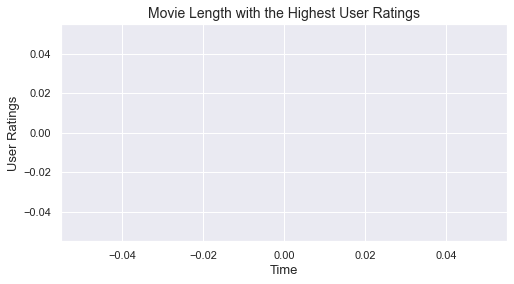

In [417]:
### Runtime film most liked by audience
run_time=df.groupby('duration')['reviews_from_users'].mean()
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(data=run_time)
#title            
plt.title("Movie Length with the Highest User Ratings",fontsize=14)            
plt.xlabel('Time',fontsize = 13)
plt.ylabel('User Ratings',fontsize = 13)
#max_value
max_run= run_time.idxmax()

print('Movie length with the highest user ratings is ', max_run, 'minutes.')

### What movie runtime is the highest rated by critics?

Movie length with the highest critic ratings is  168 minutes.


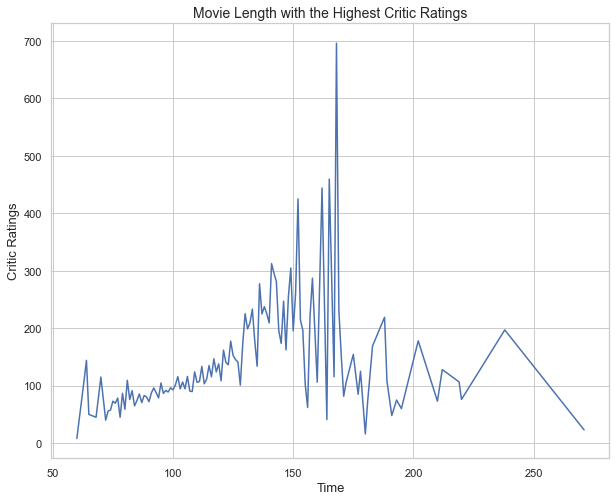

In [339]:
### Runtime film most liked by audience
run_time=df.groupby('duration')['reviews_from_critics'].mean()
run_time.plot(figsize = (10,8))
#title            
plt.title("Movie Length with the Highest Critic Ratings",fontsize=14)            
plt.xlabel('Time',fontsize = 13)
plt.ylabel('Critic Ratings',fontsize = 13)
#max_value
max_run= run_time.idxmax()

print('Movie length with the highest critic ratings is ', max_run, 'minutes.')

### What directors generate the most profit?

In [340]:
# split the actors from combined value into single actor value 
director_df = df.assign(director = df['director'].str.split(',')).explode('director')
director_df.head()

,title,date_published,genre,duration,director,writer,actors,avg_vote,votes,budget,worlwide_gross_income,reviews_from_users,reviews_from_critics,profit,roi,release_month
42868,Avatar,2010-01-15,"Action, Adventure, Fantasy",162,James Cameron,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",7.8,1101160,237000000,2790439092,3442.0,733.0,2553439092,1077.400461,1
58600,Star Wars - Il risveglio della Forza,2015-12-16,"Action, Adventure, Sci-Fi",138,J.J. Abrams,"Lawrence Kasdan, J.J. Abrams","Harrison Ford, Mark Hamill, Carrie Fisher, Ada...",7.9,845102,245000000,2068224036,4822.0,909.0,1823224036,744.173076,12
64204,Avengers: Infinity War,2018-04-25,"Action, Adventure, Sci-Fi",149,Anthony Russo,"Christopher Markus, Stephen McFeely","Robert Downey Jr., Chris Hemsworth, Mark Ruffa...",8.4,796486,321000000,2048359754,4273.0,611.0,1727359754,538.118303,4
64204,Avengers: Infinity War,2018-04-25,"Action, Adventure, Sci-Fi",149,Joe Russo,"Christopher Markus, Stephen McFeely","Robert Downey Jr., Chris Hemsworth, Mark Ruffa...",8.4,796486,321000000,2048359754,4273.0,611.0,1727359754,538.118303,4
38103,Jurassic World,2015-06-11,"Action, Adventure, Sci-Fi",124,Colin Trevorrow,"Rick Jaffa, Amanda Silver","Chris Pratt, Bryce Dallas Howard, Irrfan Khan,...",7.0,569512,150000000,1670401444,1537.0,698.0,1520401444,1013.600963,6


In [379]:
director_df.groupby('director').profit.sum().sort_values(ascending=False).head(10)

director
Steven Spielberg    6430333698
Michael Bay         3471802199
J.J. Abrams         3109829516
George Lucas        3086905149
James Cameron       2837321601
Robert Zemeckis     2764806781
Chris Buck          2749022105
Bill Condon         2498190836
Gore Verbinski      2458433272
Joss Whedon         2453068088
Name: profit, dtype: int64

### What directors have the highest user ratings?

In [364]:
# Top 10 directors based on user reviews
director_df.groupby('director').reviews_from_users.sum().sort_values(ascending=False).head(10)

director
Steven Spielberg        17120.0
J.J. Abrams             14551.0
George Lucas            13465.0
Frank Darabont          11577.0
Michael Bay             10174.0
 Lilly Wachowski         9453.0
Lana Wachowski           9453.0
Sam Raimi                9052.0
Quentin Tarantino        8791.0
Francis Ford Coppola     8676.0
Name: reviews_from_users, dtype: float64

### What directors have the highest critic reviews?

In [343]:
#Top 10 directors based on critic reviews
director_df.groupby('director').reviews_from_critics.sum().sort_values(ascending=False).head(10)


director
Steven Spielberg     3868.0
Steven Soderbergh    3065.0
Clint Eastwood       3023.0
Sam Raimi            3013.0
Woody Allen          2678.0
J.J. Abrams          2598.0
John Carpenter       2572.0
Michael Bay          2526.0
Quentin Tarantino    2511.0
Wes Craven           2265.0
Name: reviews_from_critics, dtype: float64

### What experienced directors have the highest ROI?

In [409]:
# Dictionary of directors and numbers of rows(# of movies)
dir_name_counts = director_df['director'].value_counts().to_dict()
dir_name_counts

{'Woody Allen': 27,
 'Clint Eastwood': 21,
 'Steven Spielberg': 18,
 'Rob Reiner': 16,
 'Steven Soderbergh': 16,
 'Barry Levinson': 14,
 'Ron Howard': 14,
 'Walter Hill': 13,
 'Martin Scorsese': 13,
 'Francis Ford Coppola': 13,
 'Robert Zemeckis': 13,
 'Ivan Reitman': 12,
 'Spike Lee': 12,
 'Wes Craven': 12,
 'Garry Marshall': 12,
 'Brian De Palma': 12,
 'John Carpenter': 12,
 'John Landis': 11,
 'Sam Raimi': 11,
 'Sidney Lumet': 11,
 'Tyler Perry': 11,
 'John Sayles': 11,
 'Robert Altman': 11,
 'Alfred Hitchcock': 11,
 'Kevin Smith': 11,
 'Michael Bay': 10,
 'William Friedkin': 10,
 'Dennis Dugan': 10,
 'Mike Nichols': 10,
 'Billy Wilder': 9,
 'David Gordon Green': 9,
 'Joe Dante': 9,
 ' Peter Farrelly': 9,
 'Richard Donner': 9,
 'Norman Jewison': 9,
 'Bobby Farrelly': 9,
 'Michael Ritchie': 9,
 'Jon Turteltaub': 8,
 'John Badham': 8,
 'Richard Linklater': 8,
 'Gus Van Sant': 8,
 'Mark Waters': 8,
 'Antoine Fuqua': 8,
 'Andy Tennant': 8,
 'Andrew Davis': 8,
 'Robert Redford': 8,
 'Pau

In [410]:
# Director film counts
director_df['film_count'] = director_df['director'].map(name_counts)

In [411]:
# Make new dataframe for popular directors
pop_dir_df = director_df[director_df['film_count'] >= 5]

In [412]:
# Top 10 popular directors calculated by ROI
pop_dir_df.groupby('director').roi.sum().sort_values(ascending=False).head(10)

director
Kevin Smith           16946.512111
Mel Brooks             9063.835812
Clint Eastwood         5114.423715
Woody Allen            2835.250061
Sylvester Stallone     2763.137985
Tyler Perry            2759.031397
Tom McCarthy           2388.656620
Billy Bob Thornton     2276.225249
Rob Reiner             2260.090934
Mel Gibson             2136.315060
Name: roi, dtype: float64

### What actor appears the most frequently in profitable movies?

In [344]:
# The mean of my profit is $47 million
df['profit'].describe()

count    4.161000e+03
mean     4.745823e+07
std      1.386694e+08
min     -1.107663e+08
25%     -3.450523e+06
50%      1.689963e+06
75%      3.920460e+07
max      2.553439e+09
Name: profit, dtype: float64

In [345]:
### Make new df with movies that made > $47 million dollors profit
profit_df = df[df['profit'] >= 47000000]
profit_df.head()

,title,date_published,genre,duration,director,writer,actors,avg_vote,votes,budget,worlwide_gross_income,reviews_from_users,reviews_from_critics,profit,roi,release_month
42868,Avatar,2010-01-15,"Action, Adventure, Fantasy",162,James Cameron,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",7.8,1101160,237000000,2790439092,3442.0,733.0,2553439092,1077.400461,1
58600,Star Wars - Il risveglio della Forza,2015-12-16,"Action, Adventure, Sci-Fi",138,J.J. Abrams,"Lawrence Kasdan, J.J. Abrams","Harrison Ford, Mark Hamill, Carrie Fisher, Ada...",7.9,845102,245000000,2068224036,4822.0,909.0,1823224036,744.173076,12
64204,Avengers: Infinity War,2018-04-25,"Action, Adventure, Sci-Fi",149,"Anthony Russo, Joe Russo","Christopher Markus, Stephen McFeely","Robert Downey Jr., Chris Hemsworth, Mark Ruffa...",8.4,796486,321000000,2048359754,4273.0,611.0,1727359754,538.118303,4
38103,Jurassic World,2015-06-11,"Action, Adventure, Sci-Fi",124,Colin Trevorrow,"Rick Jaffa, Amanda Silver","Chris Pratt, Bryce Dallas Howard, Irrfan Khan,...",7.0,569512,150000000,1670401444,1537.0,698.0,1520401444,1013.600963,6
65170,Frozen II - Il segreto di Arendelle,2019-11-27,"Animation, Adventure, Comedy",103,"Chris Buck, Jennifer Lee","Jennifer Lee, Hans Christian Andersen","Kristen Bell, Idina Menzel, Josh Gad, Jonathan...",6.9,122760,150000000,1450026933,1302.0,275.0,1300026933,866.684622,11


In [346]:
profit_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 936 entries, 42868 to 26982
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  936 non-null    object        
 1   date_published         936 non-null    datetime64[ns]
 2   genre                  936 non-null    object        
 3   duration               936 non-null    int64         
 4   director               936 non-null    object        
 5   writer                 936 non-null    object        
 6   actors                 936 non-null    object        
 7   avg_vote               936 non-null    float64       
 8   votes                  936 non-null    int64         
 9   budget                 936 non-null    int64         
 10  worlwide_gross_income  936 non-null    int64         
 11  reviews_from_users     936 non-null    float64       
 12  reviews_from_critics   936 non-null    float64       
 13 

In [347]:
# Remove whitespace and split actors
df['actors'] = df['actors'].str.strip().str.split(',')

In [348]:
# Create list for every actor appearance in profitable movies
list1 = []
for actor in df['actors']:
    list1.extend(actor)
  

In [349]:
# Create dataframe from the list of actor appearances and sort by number of appearances
actor_counts = pd.Series(list1).value_counts().sort_values(ascending=False).head(10)
actor_counts

 Richard Jenkins       35
 Samuel L. Jackson     34
 Alec Baldwin          30
 Steve Buscemi         30
 Keith David           28
Adam Sandler           27
 David Paymer          26
 Christopher Walken    26
 John Turturro         26
 Dan Aykroyd           26
dtype: int64

### What popular actors make the most profitable movies?

In [350]:
# split the actors from combined value into single actor value 
actor_df = df.assign(actor = df['actors'].str.split(',')).explode('actors')
actor_df.head()
    

,title,date_published,genre,duration,director,writer,actors,avg_vote,votes,budget,worlwide_gross_income,reviews_from_users,reviews_from_critics,profit,roi,release_month,actor
42868,Avatar,2010-01-15,"Action, Adventure, Fantasy",162,James Cameron,James Cameron,Sam Worthington,7.8,1101160,237000000,2790439092,3442.0,733.0,2553439092,1077.400461,1,NaN
42868,Avatar,2010-01-15,"Action, Adventure, Fantasy",162,James Cameron,James Cameron,Zoe Saldana,7.8,1101160,237000000,2790439092,3442.0,733.0,2553439092,1077.400461,1,NaN
42868,Avatar,2010-01-15,"Action, Adventure, Fantasy",162,James Cameron,James Cameron,Sigourney Weaver,7.8,1101160,237000000,2790439092,3442.0,733.0,2553439092,1077.400461,1,NaN
42868,Avatar,2010-01-15,"Action, Adventure, Fantasy",162,James Cameron,James Cameron,Stephen Lang,7.8,1101160,237000000,2790439092,3442.0,733.0,2553439092,1077.400461,1,NaN
42868,Avatar,2010-01-15,"Action, Adventure, Fantasy",162,James Cameron,James Cameron,Michelle Rodriguez,7.8,1101160,237000000,2790439092,3442.0,733.0,2553439092,1077.400461,1,NaN


In [351]:
#Strip whitespace
actor_df['actors'] = actor_df['actors'].str.strip()

In [386]:
# Dictionary of actors and numbers of rows(# of movies)
name_counts = actor_df['actors'].value_counts().to_dict()
name_counts

{'Samuel L. Jackson': 45,
 'Robert De Niro': 43,
 'Bruce Willis': 41,
 'Nicolas Cage': 40,
 'Richard Jenkins': 36,
 'Alec Baldwin': 35,
 'Dan Aykroyd': 33,
 'Robert Downey Jr.': 32,
 'Steve Buscemi': 32,
 'Morgan Freeman': 31,
 'Woody Harrelson': 30,
 'Adam Sandler': 30,
 'Christopher Walken': 30,
 'Harrison Ford': 30,
 'Dennis Quaid': 30,
 'Diane Keaton': 29,
 'Eddie Murphy': 29,
 'Gene Hackman': 29,
 'Robert Duvall': 29,
 'Keith David': 28,
 'Tom Hanks': 28,
 'Nick Nolte': 28,
 'Jeff Bridges': 28,
 'Sylvester Stallone': 28,
 'John Goodman': 27,
 'John Cusack': 27,
 'Susan Sarandon': 27,
 'Forest Whitaker': 27,
 'David Paymer': 27,
 'John Turturro': 27,
 'J.K. Simmons': 27,
 'John Leguizamo': 26,
 'Stanley Tucci': 26,
 'Danny Glover': 26,
 'Ben Stiller': 26,
 'Will Ferrell': 26,
 'Laurence Fishburne': 26,
 'John Travolta': 26,
 'Bill Murray': 26,
 "Vincent D'Onofrio": 25,
 'Matthew McConaughey': 25,
 'John Heard': 25,
 'M. Emmet Walsh': 25,
 'Owen Wilson': 25,
 'Michael Keaton': 25,
 

In [387]:
# Actor film count
actor_df['film_count'] = actor_df['actors'].map(name_counts)

In [388]:
# Check new column film_count
actor_df.head()

,title,date_published,genre,duration,director,writer,actors,avg_vote,votes,budget,worlwide_gross_income,reviews_from_users,reviews_from_critics,profit,roi,release_month,actor,film_count
42868,Avatar,2010-01-15,"Action, Adventure, Fantasy",162,James Cameron,James Cameron,Sam Worthington,7.8,1101160,237000000,2790439092,3442.0,733.0,2553439092,1077.400461,1,NaN,4
42868,Avatar,2010-01-15,"Action, Adventure, Fantasy",162,James Cameron,James Cameron,Zoe Saldana,7.8,1101160,237000000,2790439092,3442.0,733.0,2553439092,1077.400461,1,NaN,16
42868,Avatar,2010-01-15,"Action, Adventure, Fantasy",162,James Cameron,James Cameron,Sigourney Weaver,7.8,1101160,237000000,2790439092,3442.0,733.0,2553439092,1077.400461,1,NaN,18
42868,Avatar,2010-01-15,"Action, Adventure, Fantasy",162,James Cameron,James Cameron,Stephen Lang,7.8,1101160,237000000,2790439092,3442.0,733.0,2553439092,1077.400461,1,NaN,16
42868,Avatar,2010-01-15,"Action, Adventure, Fantasy",162,James Cameron,James Cameron,Michelle Rodriguez,7.8,1101160,237000000,2790439092,3442.0,733.0,2553439092,1077.400461,1,NaN,5


In [407]:
# Keep popular actors who have acted in more than 20 movies 
top_actor_df = actor_df[actor_df['film_count'] >= 20]

In [408]:
# Calculate total profits per popular actor
top_actor_df.groupby('actors').profit.sum().sort_values(ascending=False).head(10)

actors
Samuel L. Jackson     9102635215
Robert Downey Jr.     6720807639
Harrison Ford         6702939166
Tom Hanks             5827155757
Scarlett Johansson    5720771620
Mark Ruffalo          5527824020
Cameron Diaz          4717976473
Jeff Goldblum         4547954847
Eddie Murphy          4525272871
Steve Carell          3864147440
Name: profit, dtype: int64

### What popular actors have the highest ROI?

In [403]:
# Top 10 popular actor with highest ROI
top_actor_df.groupby('actors').roi.sum().sort_values(ascending=False).head(10)

actors
Harrison Ford         35667.903922
Richard Dreyfuss      24846.622258
Susan Sarandon        19851.396375
Sylvester Stallone    18232.118718
John Travolta         17259.156923
Kevin Bacon           15278.046868
Danny Glover          13942.756317
Robert Duvall         12420.151534
Tom Hanks             12258.434332
Samuel L. Jackson     11319.867609
Name: roi, dtype: float64

In [404]:
# Check movies with Robert Duvall
actor_df.loc[actor_df['actors'] == "Robert Duvall"]

,title,date_published,genre,duration,director,writer,actors,avg_vote,votes,budget,worlwide_gross_income,reviews_from_users,reviews_from_critics,profit,roi,release_month,actor,film_count
27475,Deep Impact,1998-05-14,"Action, Drama, Romance",120,Mimi Leder,"Bruce Joel Rubin, Michael Tolkin",Robert Duvall,6.2,160722,75000000,349464664,554.0,141.0,274464664,365.952885,5,NaN,29
13512,Il padrino,1972-09-21,"Crime, Drama",175,Francis Ford Coppola,"Mario Puzo, Francis Ford Coppola",Robert Duvall,9.2,1572674,6000000,246120974,3977.0,253.0,240120974,4002.016233,9,NaN,29
43217,Jack Reacher - La prova decisiva,2013-01-03,"Action, Thriller",130,Christopher McQuarrie,"Lee Child, Christopher McQuarrie",Robert Duvall,7.0,301986,60000000,218340595,531.0,412.0,158340595,263.900992,1,NaN,29
30933,Fuori in 60 secondi,2000-09-15,"Action, Crime, Thriller",118,Dominic Sena,"H.B. Halicki, Scott Rosenberg",Robert Duvall,6.5,256788,90000000,237202299,552.0,135.0,147202299,163.558110,9,NaN,29
26430,Phenomenon,1996-10-18,"Drama, Fantasy, Romance",123,Jon Turteltaub,Gerald Di Pego,Robert Duvall,6.4,73669,32000000,152036382,136.0,60.0,120036382,375.113694,10,NaN,29
12675,M.A.S.H.,1970-05-16,"Comedy, Drama, War",116,Robert Altman,"Richard Hooker, Ring Lardner Jr.",Robert Duvall,7.4,66451,3500000,81600000,257.0,128.0,78100000,2231.428571,5,NaN,29
16375,Apocalypse Now,1979-12-18,"Drama, Mystery, War",147,Francis Ford Coppola,"John Milius, Francis Ford Coppola",Robert Duvall,8.4,591251,31500000,91968688,1205.0,305.0,60468688,191.964089,12,NaN,29
36346,Terra di confine - Open Range,2004-03-05,"Action, Drama, Romance",139,Kevin Costner,"Lauran Paine, Craig Storper",Robert Duvall,7.4,65567,22000000,68296293,530.0,161.0,46296293,210.437695,3,NaN,29
24887,Cronisti d'assalto,1994-03-25,"Comedy, Drama",112,Ron Howard,"David Koepp, Stephen Koepp",Robert Duvall,6.7,12708,6000000,48424341,76.0,36.0,42424341,707.072350,3,NaN,29
20855,Colors - colori di guerra,1988-05-27,"Action, Crime, Drama",120,Dennis Hopper,"Michael Schiffer, Michael Schiffer",Robert Duvall,6.8,23745,6000000,46616067,76.0,44.0,40616067,676.934450,5,NaN,29


### Do higher production budgets lead to higher profits?

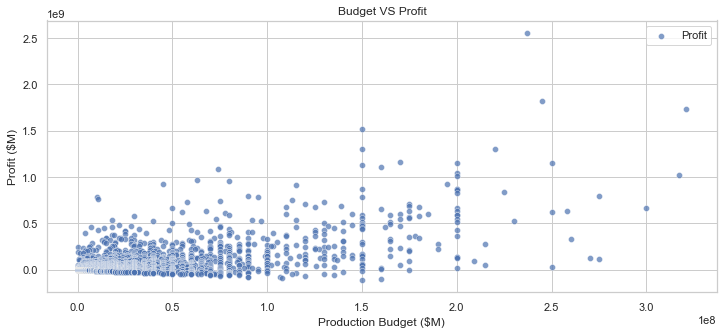

In [354]:
# Here you run your code to model the data
fig, ax = plt.subplots(figsize=(12,5))


sns.scatterplot(x = 'budget', y = 'profit', label = "Profit", alpha = 0.7, data = df)


plt.title("Budget VS Profit")
plt.ylabel("Profit ($M)")
plt.xlabel("Production Budget ($M)")
plt.legend()

### What is the most profitable genre?

In [355]:
# split the genres  from combined value into single genre value 
df_split = df.assign(genre = df['genre'].str.split(',')).explode('genre')
df_split.head()

,title,date_published,genre,duration,director,writer,actors,avg_vote,votes,budget,worlwide_gross_income,reviews_from_users,reviews_from_critics,profit,roi,release_month
42868,Avatar,2010-01-15,Action,162,James Cameron,James Cameron,"[Sam Worthington, Zoe Saldana, Sigourney Wea...",7.8,1101160,237000000,2790439092,3442.0,733.0,2553439092,1077.400461,1
42868,Avatar,2010-01-15,Adventure,162,James Cameron,James Cameron,"[Sam Worthington, Zoe Saldana, Sigourney Wea...",7.8,1101160,237000000,2790439092,3442.0,733.0,2553439092,1077.400461,1
42868,Avatar,2010-01-15,Fantasy,162,James Cameron,James Cameron,"[Sam Worthington, Zoe Saldana, Sigourney Wea...",7.8,1101160,237000000,2790439092,3442.0,733.0,2553439092,1077.400461,1
58600,Star Wars - Il risveglio della Forza,2015-12-16,Action,138,J.J. Abrams,"Lawrence Kasdan, J.J. Abrams","[Harrison Ford, Mark Hamill, Carrie Fisher, ...",7.9,845102,245000000,2068224036,4822.0,909.0,1823224036,744.173076,12
58600,Star Wars - Il risveglio della Forza,2015-12-16,Adventure,138,J.J. Abrams,"Lawrence Kasdan, J.J. Abrams","[Harrison Ford, Mark Hamill, Carrie Fisher, ...",7.9,845102,245000000,2068224036,4822.0,909.0,1823224036,744.173076,12


In [356]:
#Remove white space from genres
df_split['genre'] = df_split['genre'].str.strip()

In [357]:
#Calculate profit of each genre
df_split.groupby('genre').profit.mean().sort_values(ascending=False).head(10)

genre
Animation    2.233531e+08
Adventure    1.749874e+08
Sci-Fi       1.281056e+08
Action       9.376665e+07
Fantasy      9.153359e+07
Family       6.293284e+07
Comedy       4.599108e+07
Mystery      2.996258e+07
Thriller     2.987418e+07
Romance      2.952583e+07
Name: profit, dtype: float64

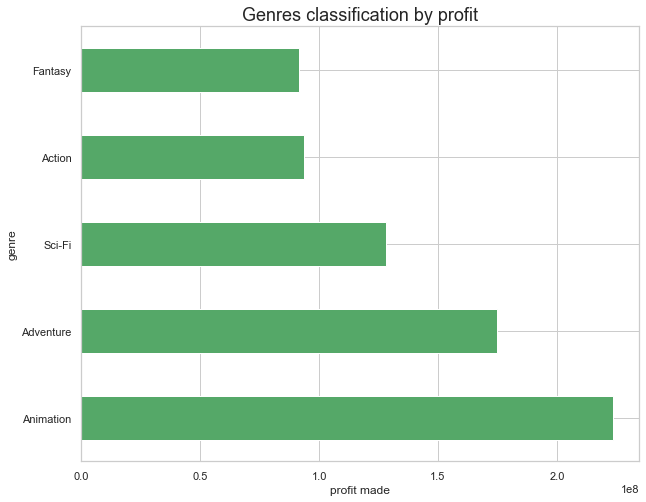

In [358]:
#plot
mean_profit_vs_genre_df['profit'].plot(stacked=False, kind='barh', figsize = (10,8),color='g');
plt.title('Genres classification by profit', size=18)
plt.xlabel('profit made', size=12);
sns.set_style("whitegrid")

### What genre is rated highest by users?

In [359]:
#Calculate user ratings of each genre
df_split.groupby('genre').reviews_from_users.mean().sort_values(ascending=False).head(10)

genre
Sci-Fi       559.592857
Adventure    478.432660
Fantasy      400.953069
Action       388.296893
Mystery      318.567568
Animation    295.156757
Horror       283.482436
Film-Noir    267.466667
Thriller     247.361734
War          235.403226
Name: reviews_from_users, dtype: float64

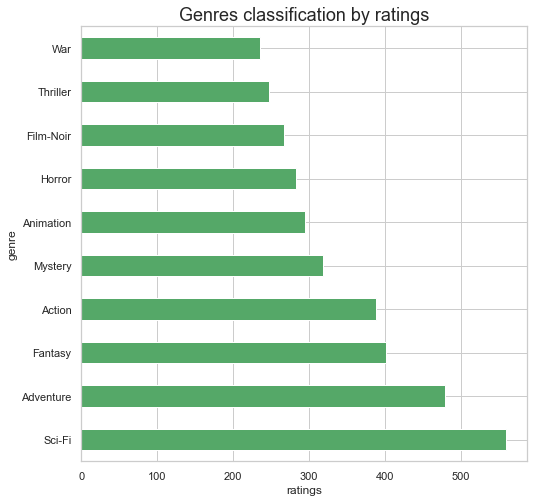

In [360]:
#plot
mean_ratings_vs_genre_df['reviews_from_users'].plot(stacked=False, kind='barh', figsize = (8,8),color='g');
plt.title('Genres classification by ratings', size=18)
plt.xlabel('ratings', size=12);
sns.set_style("whitegrid")

### What genre is rated highest by critics?

In [361]:
#Calculate critics ratings of each genre
df_split.groupby('genre').reviews_from_critics.mean().sort_values(ascending=False).head(10)

genre
Sci-Fi       188.789286
Adventure    179.710438
Animation    169.956757
Action       150.952819
Fantasy      140.574007
Mystery      133.693694
Horror       133.540984
Biography    124.436620
Thriller     116.490284
Film-Noir    113.800000
Name: reviews_from_critics, dtype: float64

In [362]:
#plot
mean_ratings_vs_genre_df['reviews_from_critics'].plot(kind='barh', figsize = (8,8), color='g');
plt.title('Genres classification by ratings', size=18)
plt.xlabel('ratings', size=12);
sns.set_style("whitegrid")

KeyError: 'reviews_from_critics'

### What months are the most profitable movies released?

In [366]:
# Calculate avg profit vs month of release
profit_by_month = df.groupby(["release_month"]).profit.mean().reset_index()
profit_by_month

,release_month,profit
0,1,4.318482e+07
1,2,4.159497e+07
2,3,3.999460e+07
3,4,4.055931e+07
4,5,4.523172e+07
5,6,4.268078e+07
6,7,2.679846e+07
7,8,4.139018e+07
8,9,5.971104e+07
9,10,5.233835e+07


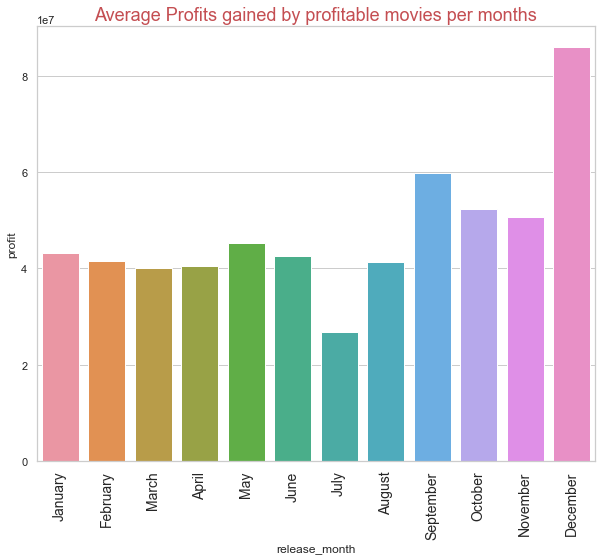

In [367]:
releasemonth_index = df.set_index('release_month')
groupby_index = releasemonth_index.groupby('release_month')
# Calculate profit per month 
profit_permonth = groupby_index['profit'].mean()
profit_permonth = pd.DataFrame(profit_permonth)

#plot our data
sns.set(rc={'figure.figsize':(10,8)}, style="whitegrid")

profit_permonth_bar = sns.barplot(x = profit_permonth.index, y = profit_permonth['profit'], data = profit_permonth)

profit_permonth_bar.axes.set_title('Average Profits gained by profitable movies per months', color="r", fontsize = 18)

month_list = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

#rotate the x-axis text 
profit_permonth_bar.set_xticklabels(month_list, rotation = 90, size = 14);

## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***